In [1]:
from AvellanedaLee.src.main import *
from dataclasses import asdict
import matplotlib.pyplot as plt

In [2]:
prices_path=Path("../../../futures_data/hourly_last.csv")
df_prices, _ = load_crypto_data(prices_path)
df_prices = df_prices[df_prices.index.hour % 24 == 0]
df_prices = df_prices.mask(df_prices == df_prices.shift())
rets = (df_prices/df_prices.shift(1)-1).dropna(how="all")

mc = rets.copy()
mc = mc.where(mc.isna(), 1e+10) # replace all non NaN entries with 1e+10

In [3]:
cfg = ALConfig()
cfg.n_pcs = 3
cfg.min_universe = 50

### Zero Transaction Cost Example

In [4]:
cfg.t_cost = 0.0
print("Backtester Configuration:")
for k, v in asdict(cfg).items():
    print(f"{k}: {v}")

Backtester Configuration:
pca_win: 252
lookback_ou: 60
n_pcs: 3
s_bo: 1.25
s_so: 1.25
s_sc: 0.5
s_bc: 0.75
b_max: 0.9672
min_universe: 50
leverage_level: 0.02
t_cost: 0.0
start_capital: 100000.0
mc_floor: 1000000000.0


In [5]:
port_zeroTC = backtest_loop(rets, mc, cfg)
perf_zeroTC = perf_metrics(port_zeroTC.equity.dropna())

backtest loop:   0%|          | 0/1899 [00:00<?, ?it/s]


--- Performance (Equity-Based) ---
Sharpe Ratio: 0.37
Maximum Drawdown: -23.15%


In [6]:
perf_zeroTC = perf_zeroTC[perf_zeroTC['daily_return']!=0]

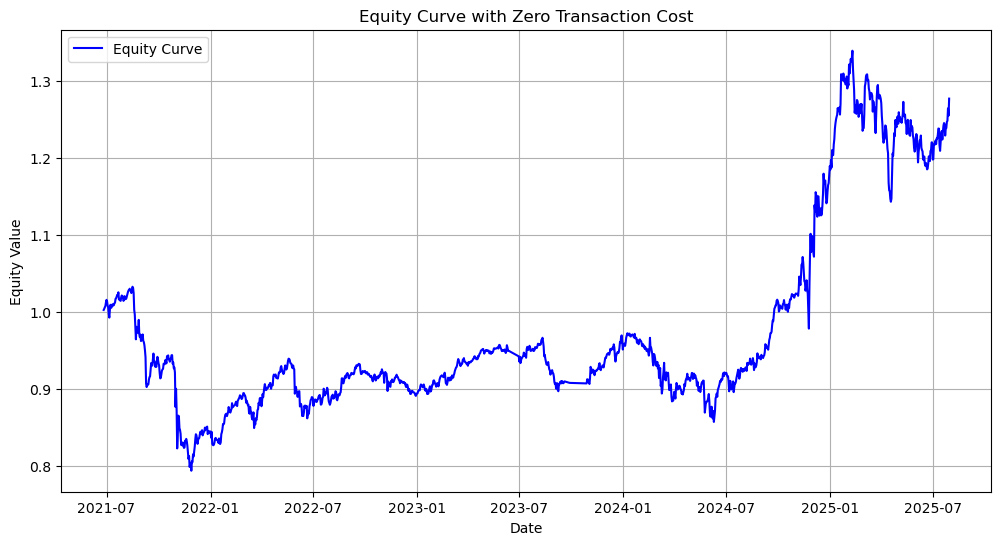

In [7]:
plt.figure(figsize=(12, 6))
plt.plot((perf_zeroTC['daily_return']+1).cumprod(), label='Equity Curve', color='blue')
plt.title('Equity Curve with Zero Transaction Cost')
plt.xlabel('Date')
plt.ylabel('Equity Value')
plt.legend()
plt.grid()
plt.show()

### 5 bps Transaction Cost Example

In [8]:
cfg.t_cost = 0.0005

In [9]:
port_5bps = backtest_loop(rets, mc, cfg)
perf_5bps = perf_metrics(port_5bps.equity.dropna())
perf_5bps = perf_5bps[perf_5bps['daily_return']!=0]


backtest loop:   0%|          | 0/1899 [00:00<?, ?it/s]


--- Performance (Equity-Based) ---
Sharpe Ratio: 0.17
Maximum Drawdown: -23.89%


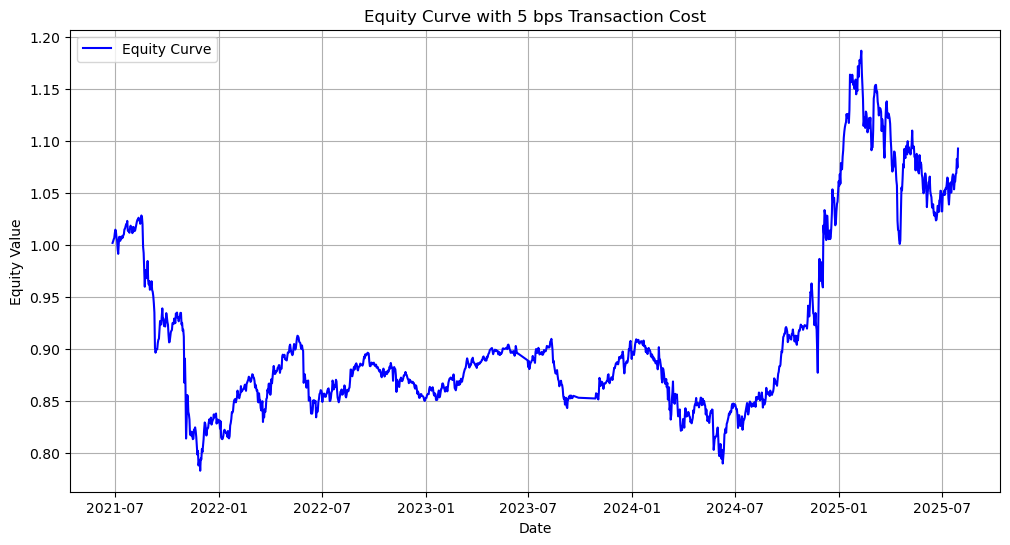

In [10]:
plt.figure(figsize=(12, 6))
plt.plot((perf_5bps['daily_return']+1).cumprod(), label='Equity Curve', color='blue')
plt.title('Equity Curve with 5 bps Transaction Cost')
plt.xlabel('Date')
plt.ylabel('Equity Value')
plt.legend()
plt.grid()
plt.show()